Sky Kapoor and Chris Compierchio

This program will simulate the motion of two particles under the influence of the Leonard-Jones potential

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

PART A

In PDF

PART B

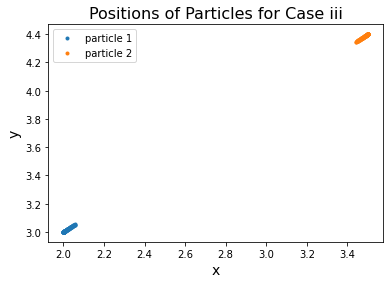

In [2]:
#define given constants
m = 1
epsilon = 1
sigma = 1

#Define time step and number of iterations
dt = 0.01
N = 100

#define r1 and r2
r1 = 0
r2 = 0

#define arrays for the x and y positions, velocities, and accelerations for both particles
x1 = np.zeros(N)
y1 = np.zeros(N)
x2 = np.zeros(N)
y2 = np.zeros(N)
v1x = np.zeros(N)
v1y = np.zeros(N)
v2y = np.zeros(N)
v2x = np.zeros(N)
a1x = np.zeros(N)
a2x = np.zeros(N)
a1y = np.zeros(N)
a2y = np.zeros(N)
r1x = np.zeros(N)
r1y = np.zeros(N)
r2x = np.zeros(N)
r2y = np.zeros(N)
r1 = np.zeros(N)
r2 = np.zeros(N)

#Define array that stores times
times = np.zeros(N)

#Define the verlet function that will use the verlet algorithm to caluclate the motion of the particles
def verlet(case):
    
    #if the case inputted is i
    if case == 'i':
        #set required initial conditions and caluclate r1 and r2
        x1[0] = 4
        y1[0] = 4
        
        x2[0] = 5.2
        y2[0] = 4
        
    #repeat for the ii case
    elif case == 'ii':
        x1[0] = 4.5
        y1[0] = 4

        x2[0] = 5.2
        y2[0] = 4
       
    #repeat for the iii case
    elif case == 'iii':
        x1[0] = 2
        y1[0] = 3

        x2[0] = 3.5
        y2[0] = 4.4
       
    #otherwise, tell the user to input i, ii, or iii
    else:
        print("Input must be 'i', 'ii', or 'iii'")
    
    #begin loop through N
    for i in range(N-1):
        
        #Calculate rx and ry as described in part A
        r1x[i] = x1[0] - x2[0]
        r1y[i] = y1[0] - y2[0]
        r2x[i] = x2[0] - x1[0]
        r2y[i] = y2[0] - y1[0]
       
        #Calculate r for each particle
        r1[i] = np.sqrt(r1x[i]**2 + r1y[i]**2)
        r2[i] = np.sqrt(r2x[i]**2 + r2y[i]**2) 
        
        #define accelerations of each particle
        a1x[i] = 4*((12/r1[i]**13)-(6/r1[i]**7)) * r1x[i]/r1[i]
        a1y[i] = 4*((12/r1[i]**13)-(6/r1[i]**7)) * r1y[i]/r1[i]
        a2x[i] = 4*((12/r2[i]**13)-(6/r2[i]**7)) * r2x[i]/r2[i]
        a2y[i] = 4*((12/r2[i]**13)-(6/r2[i]**7)) * r2y[i]/r2[i]
        
        #if i = 0, use the euler-cromer method to find the 2nd positions and velocities for each particle
        if i == 0:
            
            v1x[i+1] = v1x[i] + a1x[i]*dt
            x1[i+1] = x1[i] + v1x[i+1]*dt
            
            v1y[i+1] = v1y[i] + a1y[i]*dt
            y1[i+1] = y1[i] + v1y[i+1]*dt
            
            v2x[i+1] = v2x[i] + a2x[i]*dt
            x2[i+1] = x2[i] + v2x[i+1]*dt
            
            v2y[i+1] = v2y[i] + a2y[i]*dt
            y2[i+1] = y2[i] + v2y[i+1]*dt
    
        #otherwise, use the verlet method to do this
        else:
            x1[i+1] = x1[i] + v1x[i]*dt + a1x[i]*0.5*dt**2
            y1[i+1] = y1[i] + v1y[i]*dt + a1y[i]*0.5*dt**2

            x2[i+1] = x2[i] + v2x[i]*dt + a2x[i]*0.5*dt**2
            y2[i+1] = y2[i] + v2y[i]*dt + a2y[i]*0.5*dt**2
            
            r1x[i+1] = x1[i] - x2[i]
            r1y[i+1] = y1[i] - y2[i]
            r2x[i+1] = x2[i] - x1[i]
            r2y[i+1] = y2[i] - y1[i]
            
            r1[i+1] = np.sqrt(r1x[i+1]**2 + r1y[i+1]**2)
            r2[i+1] = np.sqrt(r2x[i+1]**2 + r2y[i+1]**2) 
        
            a1x[i+1] = 4*((12/r1[i+1]**13)-(6/r1[i+1]**7)) * r1x[i+1]/r1[i+1]
            a1y[i+1] = 4*((12/r1[i+1]**13)-(6/r1[i+1]**7)) * r1y[i+1]/r1[i+1]
            a2x[i+1] = 4*((12/r2[i+1]**13)-(6/r2[i+1]**7)) * r2x[i+1]/r2[i+1]
            a2y[i+1] = 4*((12/r2[i+1]**13)-(6/r2[i+1]**7)) * r2y[i+1]/r2[i+1]
            
            v1x[i+1] = v1x[i] + 0.5 * (a1x[i] + a1x[i+1])*dt
            v1y[i+1] = v1y[i] + 0.5 * (a1y[i] + a1y[i+1])*dt
            
            v2x[i+1] = v2x[i] + 0.5 * (a2x[i] + a2x[i+1])*dt
            v2y[i+1] = v2y[i] + 0.5 * (a2y[i] + a2y[i+1])*dt
            
        #update the times
        times[i+1] = times[i] + dt
       
    #return positions, velocities and times
    return x1, y1, v1x, v1y, x2, y2, v2x, v2y, times

#plot trajectories for the iii case
plt.plot(verlet("iii")[0], verlet("iii")[1], "." , label = "particle 1")
plt.plot(verlet("iii")[4], verlet("iii")[5], ".", label = "particle 2")
plt.title("Positions of Particles for Case iii", fontsize = 16)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.legend(loc = "best")
plt.show()

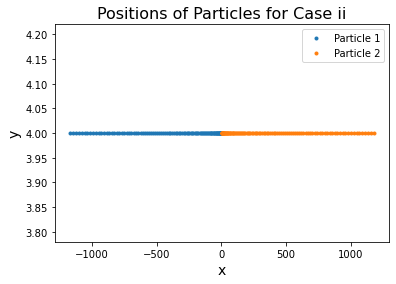

In [3]:
#plot the trajectories for the ii case
plt.plot(verlet("ii")[0], verlet("ii")[1], "." , label = "Particle 1")
plt.plot(verlet("ii")[4], verlet("ii")[5], ".", label = "Particle 2")

plt.title("Positions of Particles for Case ii", fontsize = 16)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.legend(loc = "best")
plt.show()

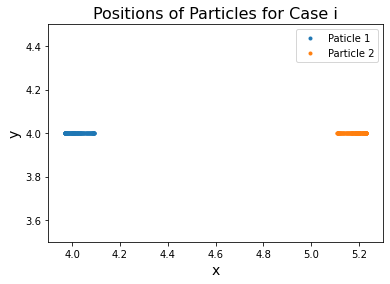

In [4]:
#plot the trajectories for the i case
plt.plot(verlet("i")[0], verlet("i")[1], ".", label = "Paticle 1")
plt.plot(verlet("i")[4], verlet("i")[5], ".", label = "Particle 2")
plt.xlim(3.9, 5.3)
plt.ylim(3.5,4.5)
plt.title("Positions of Particles for Case i", fontsize = 16)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.legend(loc = "best")
plt.show()

PART C